In [1]:
pip install numpy matplotlib seaborn tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix


## 1. Carga inicial del Dataset


In [4]:
# Cargamos el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostramos la forma de los datos
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


## 2. Visualizacion de ejemplos del Dataset

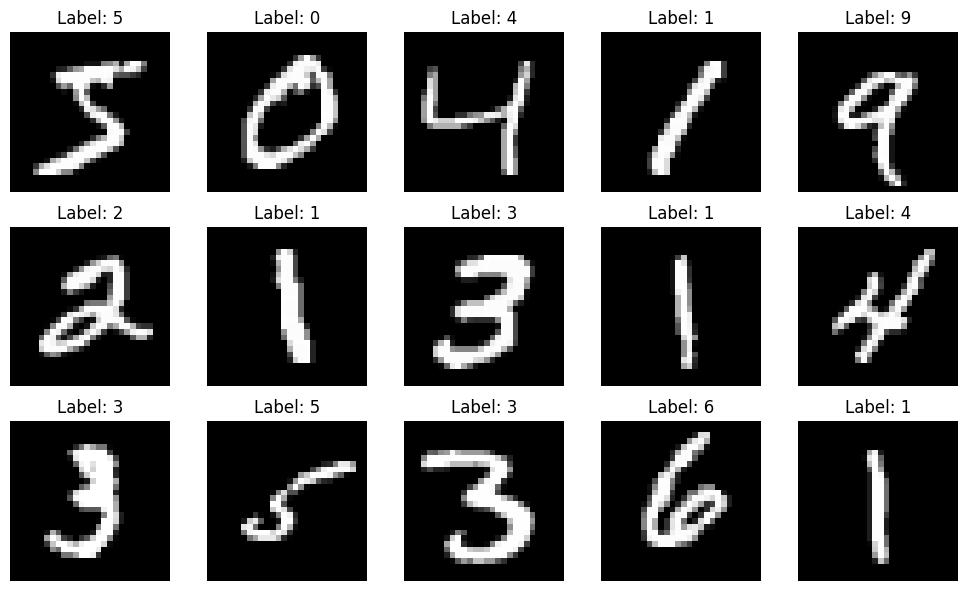

In [5]:
# Visualizamos algunas imágenes de ejemplo
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


## 3. Analisis de los datos
Utilizamos un gráfico de barras para ver cuántas imágenes hay de cada dígito. Esto ayuda a detectar posibles desbalances en las clases.

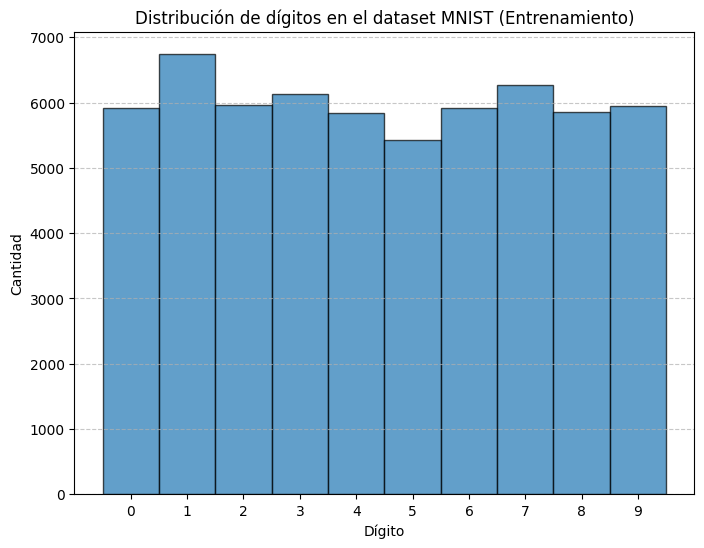

In [6]:
# Analizamos la distribución de las clases en el conjunto de entrenamiento
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=np.arange(11) - 0.5, edgecolor='black', alpha=0.7)
plt.title("Distribución de dígitos en el dataset MNIST (Entrenamiento)")
plt.xlabel("Dígito")
plt.ylabel("Cantidad")
plt.xticks(range(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## 4. Preprocesamiento de los datos
Se normalizan las imágenes para mejorar la estabilidad del entrenamiento y se redimensionan añadiendo una dimensión de canal para que sean compatibles con la CNN. Además, se convierten las etiquetas a formato one-hot.

In [7]:
# Normalización de los valores de píxel: Escalamos al rango [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Redimensionamos las imágenes para incluir la dimensión de canal
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convertimos las etiquetas a one-hot encoding
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print("Nueva forma de x_train:", x_train.shape)


Nueva forma de x_train: (60000, 28, 28, 1)


## 5. Division del Dataset en Entrenamiento, Validación y Test
Se realiza una nueva partición del conjunto original de entrenamiento para disponer de un conjunto de validación, lo cual es importante para monitorear el desempeño del modelo durante el entrenamiento y evitar overfitting.

In [8]:
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de entrenamiento en entrenamiento y validación (80% entrenamiento, 20% validación)
x_train_sub, x_val, y_train_sub, y_val = train_test_split(x_train, y_train_cat, test_size=0.20, random_state=42)

print("x_train_sub shape:", x_train_sub.shape)
print("x_val shape:", x_val.shape)


x_train_sub shape: (48000, 28, 28, 1)
x_val shape: (12000, 28, 28, 1)


## 5. Construccion del modelo

In [9]:
# Construimos una CNN básica
model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Segunda capa convolucional
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplanamiento de la salida
model.add(Flatten())

# Capa densa totalmente conectada
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Capa de salida con 10 neuronas (una por dígito)
model.add(Dense(num_classes, activation='softmax'))

# Compilamos el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


c:\Users\Alumno_AI\Desktop\Redes_Convuncionales\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Entrenamiento del Modelo 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definir EarlyStopping para evitar sobreentrenamiento
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)

# Definir ModelCheckpoint para guardar el mejor modelo
checkpoint = ModelCheckpoint(
    filepath='best_model.keras',   # Ruta donde se guardará el mejor modelo
    monitor='val_loss',            # Métrica a monitorear
    save_best_only=True,           # Solo guardar el mejor
    mode='min',                    # Buscar el valor mínimo
    verbose=1                      # Mostrar mensaje al guardar
)

# Entrenar el modelo con ambos callbacks
history = model.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8275 - loss: 0.5512 - val_accuracy: 0.9805 - val_loss: 0.0660
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9705 - loss: 0.1037 - val_accuracy: 0.9869 - val_loss: 0.0465
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9781 - loss: 0.0749 - val_accuracy: 0.9878 - val_loss: 0.0396
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9837 - loss: 0.0538 - val_accuracy: 0.9877 - val_loss: 0.0416
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9859 - loss: 0.0444 - val_accuracy: 0.9897 - val_loss: 0.0331
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9875 - loss: 0.0402 - val_accuracy: 0.9902 - val_loss: 0.0340
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9909 - val_loss: 0.0334
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0.

## 7. Evalucion del modelo


In [11]:
# Evaluamos el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Precisión en test: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0307
Precisión en test: 99.16%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


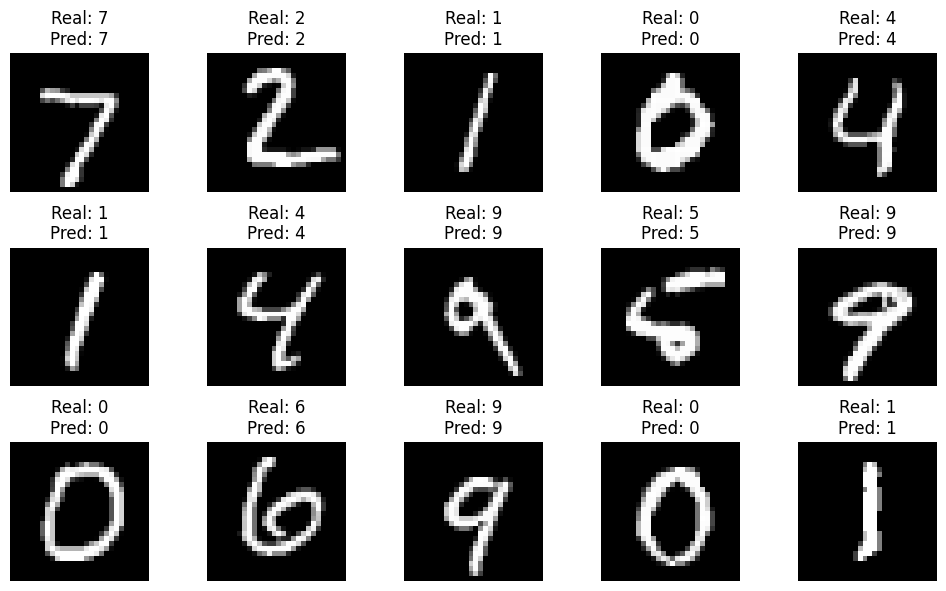

In [12]:
# Obtenemos las predicciones del modelo
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convertimos las predicciones a clases

# Mostramos algunas predicciones junto con los valores reales
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Real: {y_test[i]}\nPred: {y_pred_classes[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



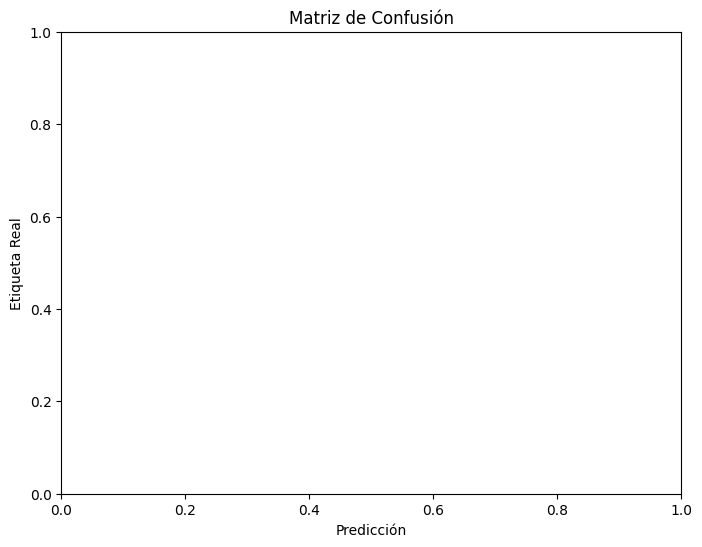

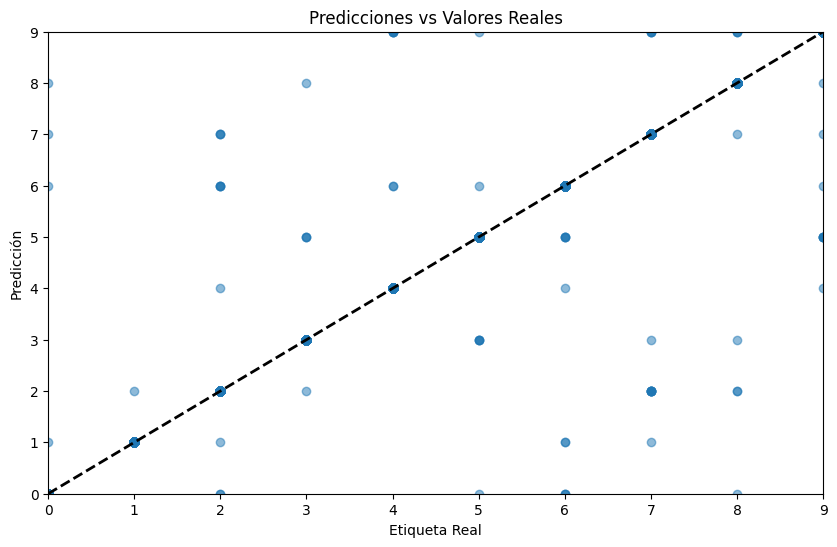

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

# Cargar el mejor modelo guardado
best_model = load_model('modelo_imagenes.h5')

# Predecir valores en el conjunto de prueba con el mejor modelo
y_pred_probs = best_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Obtener las predicciones de clase

# Obtener las etiquetas reales
y_true = np.argmax(y_test_cat, axis=1)  # Convertir las etiquetas one-hot a clases

# Calcular el informe de clasificación
report = classification_report(y_true, y_pred)
print("Informe de Clasificación:\n", report)

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

# Gráfico de Predicciones vs Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5)
plt.plot([0, 9], [0, 9], "k--", lw=2)  # Línea de referencia
plt.xlim(0, 9)
plt.ylim(0, 9)
plt.xlabel("Etiqueta Real")
plt.ylabel("Predicción")
plt.title("Predicciones vs Valores Reales")
plt.show()

In [14]:
import pandas as pd
import numpy as np

# Calcular el porcentaje de error (donde las predicciones no coinciden con los valores reales)
error_porcentual = np.where(y_test != y_pred_classes, 100, 0)

# Crear un DataFrame con los valores reales, predichos y el error %
df_comparison = pd.DataFrame({
    'Etiqueta Real': y_test,
    'Etiqueta Predicha': y_pred_classes,
    'Error %': error_porcentual
})

# Calcular el porcentaje de error promedio
print(f"Average Percentage Error: {df_comparison['Error %'].mean():.2f}%")

# Mostrar el DataFrame
df_comparison

Average Percentage Error: 0.84%


,Etiqueta Real,Etiqueta Predicha,Error %
0,7,7,0
1,2,2,0
2,1,1,0
3,0,0,0
4,4,4,0
...,...,...,...
9995,2,2,0
9996,3,3,0
9997,4,4,0
9998,5,5,0


In [15]:
model.save('modelo_imagenes.h5')